In [ ]:
import os
import sys
sys.path.append('..')
sys.path.append('../utils/')
import pandas as pd
import numpy as np
from tqdm import tqdm
import numpy as np
import hiplot as hip 
#import polars as pl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from utils.EDA import*
#import endaq.plot.dashboards

In [ ]:
path_to_dataset = "../1.ETL/Datasets/Processed/ETL2_train.parquet"
df = pd.read_parquet(path_to_dataset)

In [ ]:
#label_df = pd.read_parquet('../1.ETL/Datasets/Processed/ETL2_train_label.parquet')
#label_df[(label_df['Label']==1)]

In [ ]:
#df = label_df

# Understanding the data

- Data acquisition is done indirectly using Bosch CISS accelerometer sensors mounted at the spindle housing's rear end;
- The sensors maintain a constant distance to the tool center point, and their axes align with the machine's linear motion axi;
- The frequencies of the tool operations are in a range of 75 Hz to 1 kHz;

- The machine performs a sequence of several operations using different tools on aluminium parts to work the specified design;
- The machines produce different parts and the process flow changes over time. To study the drift between machines and over time, the dataset is built with 15 different tool operations that run on all 3 machines at different time frames.

- Table gives an overview on the characteristics of the different operations:


In [ ]:
df

In [ ]:
plot_by_code_index_matplotlib(df, process='OP06', machine = 'M01',axis='Z_axis', decimation_factor=100)

In [ ]:
plot_by_code_index_matplotlib(df, process='OP06', machine = 'M01',axis='Y_axis', decimation_factor=100)

In [ ]:
plot_by_code_index_matplotlib(df, process='OP06', machine = 'M01',axis='X_axis', decimation_factor=100)

In [ ]:
plot_by_code_index_matplotlib(df, process='OP06', machine = 'M02',axis='Z_axis', decimation_factor=100)

In [ ]:
plot_all_axis_matplotlib(df, process='OP06', machine='M01', by_code=False,decimation_factor=100)

In [ ]:
plot_all_axis_matplotlib(df, process='OP06', machine='M02', by_code=False,decimation_factor=100)

In [ ]:
plot_all_axis_matplotlib(df, process='OP06', machine='M03', by_code=False,decimation_factor=100)

In [ ]:
# Pasta principal para salvar as imagens
output_folder = 'Images'
os.makedirs(output_folder, exist_ok=True)  # Cria a pasta se ela não existir

# Número total de processos
total_processes = 15

# Pasta para a máquina M01
machine_folder = os.path.join(output_folder, 'M01')
os.makedirs(machine_folder, exist_ok=True)  # Cria a pasta M01 se ela não existir

# Loop sobre os processos de 'OP00' a 'OP14' com um progress bar
for i in tqdm(range(total_processes), desc='Salvando imagens'):
    process = f'OP{i:02}'  # Formata o número do processo com dois dígitos (e.g., 'OP00', 'OP01', ..., 'OP14')
    filename = os.path.join(machine_folder, f'{process}.png')  # Caminho completo do arquivo de imagem
    
    # Chama a função plot_all_axis_matplotlib para o processo atual e salva a imagem
    plot_all_axis_matplotlib(df, process=process, machine='M01', by_code=False, decimation_factor=100)
    plt.savefig(filename)  # Salva a imagem no arquivo
    
    # Limpa a figura atual para liberar memória
    plt.clf()


In [ ]:
# Pasta principal para salvar as imagens
output_folder = 'Images'
os.makedirs(output_folder, exist_ok=True)  # Cria a pasta se ela não existir

# Número total de processos
total_processes = 15

# Machine Folder
machine_folder = os.path.join(output_folder, 'M02')
os.makedirs(machine_folder, exist_ok=True)  

# Loop sobre os processos de 'OP00' a 'OP14' com um progress bar
for i in tqdm(range(total_processes), desc='Saving images'):
    process = f'OP{i:02}'  # Formata o número do processo com dois dígitos (e.g., 'OP00', 'OP01', ..., 'OP14')
    filename = os.path.join(machine_folder, f'{process}.png')  # Caminho completo do arquivo de imagem
    
    # Chama a função plot_all_axis_matplotlib para o processo atual e salva a imagem
    plot_all_axis_matplotlib(df, process=process, machine='M02', by_code=False, decimation_factor=100)
    plt.savefig(filename)  # Salva a imagem no arquivo
    
    # Limpa a figura atual para liberar memória
    plt.clf()


In [ ]:
# Pasta principal para salvar as imagens
output_folder = 'Images'
os.makedirs(output_folder, exist_ok=True)  # Cria a pasta se ela não existir

# Número total de processos
total_processes = 15

# Machine Folder
machine_folder = os.path.join(output_folder, 'M03')
os.makedirs(machine_folder, exist_ok=True)  

# Loop sobre os processos de 'OP00' a 'OP14' com um progress bar
for i in tqdm(range(total_processes), desc='Saving images'):
    process = f'OP{i:02}'  # Formata o número do processo com dois dígitos (e.g., 'OP00', 'OP01', ..., 'OP14')
    filename = os.path.join(machine_folder, f'{process}.png')  # Caminho completo do arquivo de imagem
    
    # Chama a função plot_all_axis_matplotlib para o processo atual e salva a imagem
    plot_all_axis_matplotlib(df, process=process, machine='M03', by_code=False, decimation_factor=100)
    plt.savefig(filename)  # Salva a imagem no arquivo
    
    # Limpa a figura atual para liberar memória
    plt.clf()


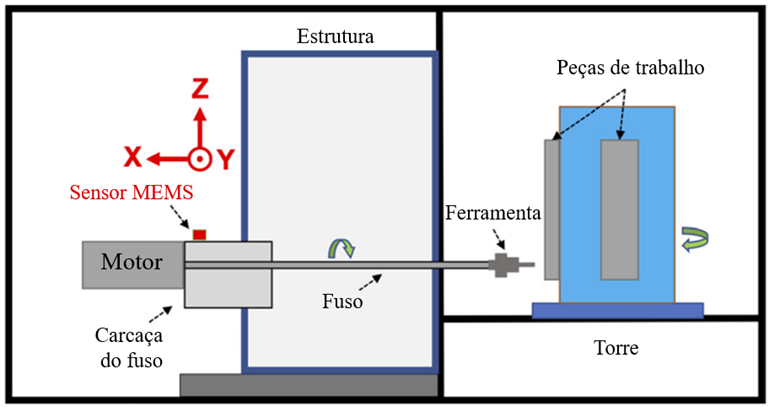

In [ ]:
plot_scatter_matrix(df, machine= 'M01', process = 'OP01', sample_frac=0.2)

In [ ]:
plot_scatter_matrix(df, machine= 'M01', process = 'OP06', sample_frac=0.2)

In [ ]:
plot_scatter_matrix(df, machine= 'M02', process = 'OP06', sample_frac=0.2)

In [ ]:
plot_scatter_matrix(df, machine= 'M03', process = 'OP06', sample_frac=0.2)

In [ ]:
# Criando o experimento HiPlot a partir do DataFrame
exp = hip.Experiment.from_dataframe(df)

# Definindo as dimensões que serão exibidas no plot
exp.display_data(hip.Displays.PARALLEL_PLOT).update({
    'hide': ['Month','Year','Time','Unique_Code']  # Oculta a coluna 'Year_Color' se você não deseja exibi-la
})

# Definindo a cor das linhas com base na coluna 'Year_Color'
exp.display_data(hip.Displays.PARALLEL_PLOT).update({
    'colorby': 'Period',
    'colorscale': 'Plotly3'  # Você pode escolher entre várias escalas de cores disponíveis
})

# Exibindo o plot
exp.display()
